In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data0 = pd.read_csv('data.csv')  # 读取训练数据
data0.head()

,time,open,high,low,upstop,downstop,volume,money,close
0,2008/4/1,4.5120,4.6280,4.1830,5.0948,4.1674,79590208.00,15060965,4.1987
1,2008/4/2,4.2864,4.4494,4.0734,4.6186,3.7788,76471291.39,14879058,4.1830
2,2008/4/3,4.1830,4.3710,4.1517,4.6029,3.7663,34263183.34,6639563,4.3616
3,2008/4/7,4.3240,4.6436,4.2864,4.7972,3.9261,53019075.67,9670526,4.6374
4,2008/4/8,4.6342,4.7502,4.5590,5.1011,4.1736,69737541.28,12327786,4.6969


In [3]:
feat=8
data=data0.iloc[:,1:]
yy=data0.iloc[:,feat:]#切片是前闭后开[)
data=(data - data.min()) / (data.max() - data.min())
data.tail()

,open,high,low,upstop,downstop,volume,money,close
2499,0.884252,0.941562,0.950832,0.896537,0.896949,0.505236,0.185197,1.000000
2500,0.960763,1.000000,1.000000,1.000000,1.000000,0.000000,0.385611,0.984212
2501,1.000000,0.956482,0.937487,0.984451,0.983921,0.609463,0.269785,0.923693
2502,0.873135,0.841470,0.876378,0.924048,0.923991,0.554306,0.247982,0.819100
2503,0.814280,0.861364,0.877783,0.819389,0.818748,0.563218,0.253455,0.915142


In [4]:
X=data.iloc[:-1,:]
y=data.iloc[1:,feat-1:feat]#切片是前闭后开[)
print(X.shape)
print(y.shape)

(2503, 8)
(2503, 1)


In [5]:
X['goal'] = y.values
x=X.iloc[:,:feat]
y=X.iloc[:,feat:feat+1]
print(x.shape)
print(y.shape)

(2503, 8)
(2503, 1)


E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
cut=len(y)*9//10
X_train, X_test=x.iloc[:cut],x.iloc[cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:cut],y.iloc[cut:]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

18016
2008
2252
251


In [7]:
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
#X=X.values#将Pandas中的dataframe转成numpy中的array，（转化成数组）才能进行多元线性回归的计算
#y=y.values
print(X_train)
print(y_train)

[[0.15719536 0.15313982 0.14890778 ... 0.28840062 0.03529257 0.13751661]
 [0.14244235 0.14203652 0.14120952 ... 0.28783939 0.03485327 0.13648384]
 [0.13568056 0.1371625  0.14670928 ... 0.28024429 0.01495514 0.14823245]
 ...
 [0.31803973 0.30308418 0.34203133 ... 0.29206195 0.03261979 0.32120538]
 [0.31931493 0.30369343 0.34408934 ... 0.28842987 0.02577164 0.32185004]
 [0.32059012 0.30490572 0.34614736 ... 0.29290488 0.03392982 0.32506019]]
[[0.13648384]
 [0.14823245]
 [0.16637503]
 ...
 [0.32185004]
 [0.32506019]
 [0.32377745]]


In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

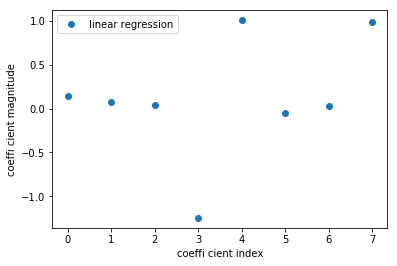

In [9]:
plt.plot(lr.coef_[0], 'o', label = 'linear regression')
plt.xlabel("coeffi cient index")
plt.ylabel("coeffi cient magnitude")
plt.legend()

In [10]:
y_train_predict=lr.predict(X_train)[:,0]
y_train=y_train[:,0]

在训练集上的表现:


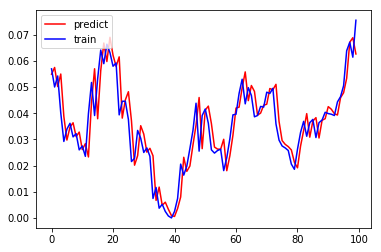

In [11]:
plt.plot(y_train_predict[100:200],color='red', label='predict')
plt.plot(y_train[100:200],color='blue', label='train')
plt.legend(loc='upper left')
print('在训练集上的表现:')
plt.show()

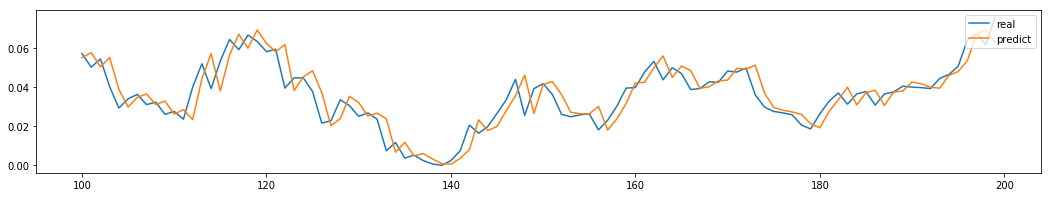

In [12]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:200,0].plot(figsize=(18,3))
draw.iloc[100:200,1].plot(figsize=(18,3))
plt.legend(('real', 'predict'),loc='upper right')
#展示在训练集上的表现 图更好看

In [13]:
y_test_predict=lr.predict(X_test)[:,0]
y_test=y_test[:,0]

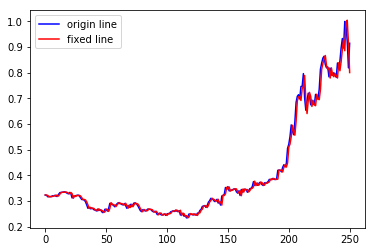

In [14]:
plt.plot(y_test, 'b', label='origin line')
plt.plot(y_test_predict, 'r', label='fixed line')
plt.legend()
plt.show()
#展示在测试集上的表现 

Text(0.5,1,'linear regression')

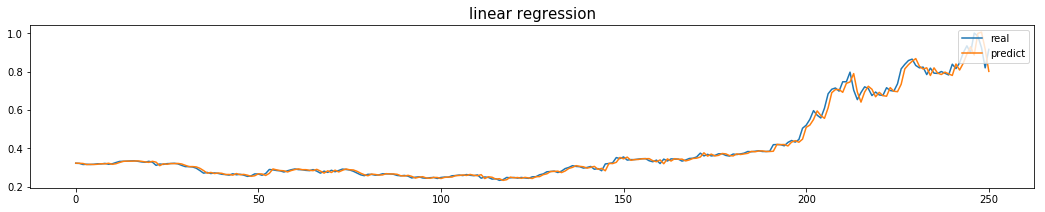

In [15]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(18,3))
draw.iloc[:,1].plot(figsize=(18,3))
plt.legend(('real', 'predict'),loc='upper right')
plt.title("linear regression",fontsize='15') #添加标题
#展示在测试集上的表现 图更好看

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(lr.predict(X_train), y_train))
print(mean_squared_error(lr.predict(X_train), y_train) )
#训练集上的MAE和MSE

0.007414699365270386
0.00012072042663718192


In [17]:
print(mean_absolute_error(lr.predict(X_test), y_test))
print(mean_squared_error(lr.predict(X_test), y_test) )
#测试集上的MAE和MSE

0.011840275586731097
0.0004707911934381988


In [18]:
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

预测涨跌正确: 0.44
